In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import cv2

from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from skimage.transform import resize

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 確認壓縮檔路徑
filepath='/content/drive/MyDrive/碩一下/自動駕駛/project2/'
os.listdir(filepath)

Mounted at /content/drive


['traffic_sign.zip']

In [ ]:
# 解壓縮檔案
!unzip '/content/drive/MyDrive/碩一下/自動駕駛/project2/traffic_sign.zip' -d '/content/drive/MyDrive/碩一下/自動駕駛/project2/'

串流輸出內容已截斷至最後 5000 行。
  inflating: /content/drive/MyDrive/碩一下/自動駕駛/project2/train/5/00005_00053_00010.png  
  inflating: /content/drive/MyDrive/碩一下/自動駕駛/project2/train/5/00005_00053_00011.png  
  inflating: /content/drive/MyDrive/碩一下/自動駕駛/project2/train/5/00005_00053_00012.png  
  inflating: /content/drive/MyDrive/碩一下/自動駕駛/project2/train/5/00005_00053_00013.png  
  inflating: /content/drive/MyDrive/碩一下/自動駕駛/project2/train/5/00005_00053_00014.png  
  inflating: /content/drive/MyDrive/碩一下/自動駕駛/project2/train/5/00005_00053_00015.png  
  inflating: /content/drive/MyDrive/碩一下/自動駕駛/project2/train/5/00005_00053_00016.png  
  inflating: /content/drive/MyDrive/碩一下/自動駕駛/project2/train/5/00005_00053_00017.png  
  inflating: /content/drive/MyDrive/碩一下/自動駕駛/project2/train/5/00005_00053_00018.png  
  inflating: /content/drive/MyDrive/碩一下/自動駕駛/project2/train/5/00005_00053_00019.png  
  inflating: /content/drive/MyDrive/碩一下/自動駕駛/project2/train/5/00005_00053_00020.png  
  inflating: /content/drive/MyDri

In [ ]:
dirpath = '/content/drive/MyDrive/碩一下/自動駕駛/project2/'
os.listdir(dirpath)

['traffic_sign.zip',
 'Meta.csv',
 'Meta',
 'Test.csv',
 'Test',
 'Train.csv',
 'Train',
 'meta',
 'test',
 'train']

# Data Preprocessing

In [ ]:
imgs_path = '/content/drive/MyDrive/碩一下/自動駕駛/project2/Train'
data_list = []
labels_list = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((32,32))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)
data = np.array(data_list)
labels = np.array(labels_list)

print('Training data : ', data.shape)

Training data :  (39209, 32, 32, 3)


In [ ]:
def prep_dataset(X,y):
    X_prep = X.astype('float32')
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)

X, y = prep_dataset(data,labels)

print(X.shape)
print(y.shape)

(39209, 32, 32, 3)
(39209, 43)


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size=0.2, shuffle=True,stratify=y)

print('Training data : ', X_train.shape)
print('Validation data : ', X_val.shape)

Training data :  (31367, 32, 32, 3)
Validation data :  (7842, 32, 32, 3)


# Build & Train Model

In [ ]:
# defining model structure
model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5), activation ='relu', input_shape = (32,32,3)))
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Dropout(rate = 0.25))

model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation ='relu'))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation ='relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Dropout(rate = 0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(rate = 0.25))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(rate = 0.25))
model.add(layers.Dense(43, activation= 'softmax'))

# model compilation
model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

In [ ]:
'''model = models.Sequential() #Sequential Model

#ConvLayer(64 filters) + MaxPooling + BatchNormalization + Dropout
model.add(layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=X.shape[1:]))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
#ConvLayer(128 filters) + MaxPooling + BatchNormalization + Dropout
model.add(layers.Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
#ConvLayer(512 filters) + Dropout + ConvLayer(512 filters) + MaxPooling + BatchNormalization
model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())

#Flatten
model.add(layers.Flatten())
#2 Dense layers with 4000 hidden units
model.add(layers.Dense(4000,activation='relu'))
model.add(layers.Dense(4000,activation='relu'))
#Dense layer with 1000 hidden units
model.add(layers.Dense(1000,activation='relu'))
#Softmax layer for output
model.add(layers.Dense(43,activation='softmax'))

model.summary()'''

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0

In [ ]:
!pip install visualkeras
import visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


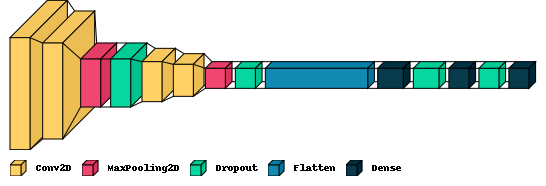

In [ ]:
from PIL import ImageFont
# visualkeras.graph_view(model)
visualkeras.layered_view(model, legend=True)

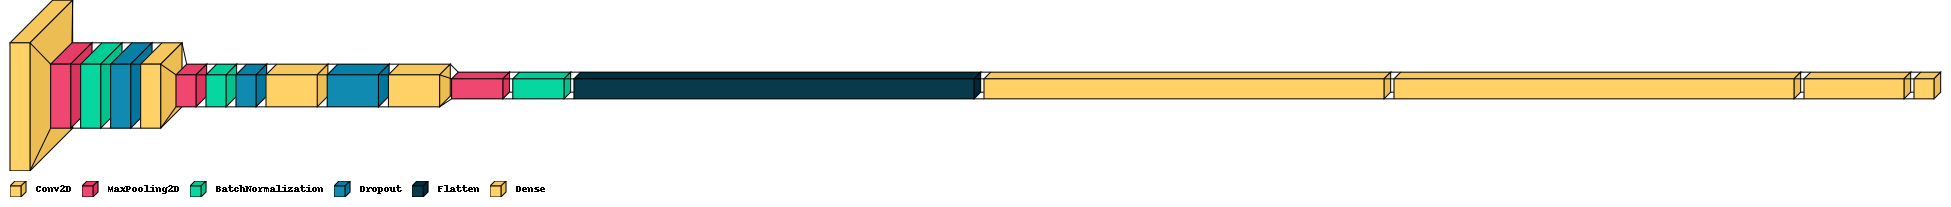

In [ ]:
'''
from PIL import ImageFont
# visualkeras.graph_view(model)
visualkeras.layered_view(model, legend=True) '''

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history= model.fit(X_train,Y_train,
                 epochs=20,
                 batch_size=64,
                 validation_data=(X_val,Y_val))

Epoch 1/20
491/491 [==============================] - 18s 9ms/step - loss: 2.3078 - accuracy: 0.4519 - val_loss: 0.4594 - val_accuracy: 0.8803
Epoch 2/20
491/491 [==============================] - 3s 7ms/step - loss: 0.5595 - accuracy: 0.8364 - val_loss: 0.1665 - val_accuracy: 0.9551
Epoch 3/20
491/491 [==============================] - 4s 9ms/step - loss: 0.3210 - accuracy: 0.9072 - val_loss: 0.0760 - val_accuracy: 0.9790
Epoch 4/20
491/491 [==============================] - 4s 8ms/step - loss: 0.2190 - accuracy: 0.9361 - val_loss: 0.0867 - val_accuracy: 0.9778
Epoch 5/20
491/491 [==============================] - 3s 7ms/step - loss: 0.1789 - accuracy: 0.9486 - val_loss: 0.0585 - val_accuracy: 0.9853
Epoch 6/20
491/491 [==============================] - 4s 8ms/step - loss: 0.1857 - accuracy: 0.9492 - val_loss: 0.0463 - val_accuracy: 0.9899
Epoch 7/20
491/491 [==============================] - 4s 8ms/step - loss: 0.1413 - accuracy: 0.9610 - val_loss: 0.0467 - val_accuracy: 0.9895
Epoch

# Show loss & accuracy curve

<ipython-input-13-6f7055587b3a>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=history.history, x=range(len(history.history['accuracy'])),
<ipython-input-13-6f7055587b3a>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=history.history, x=range(len(history.history['val_accuracy'])),
<ipython-input-13-6f7055587b3a>:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=history.history, x=range(len(history.history['loss'])),
<ipython-input-13-6f7055587b3a>:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=history.history, x=range(len(history.history['val_loss'])),


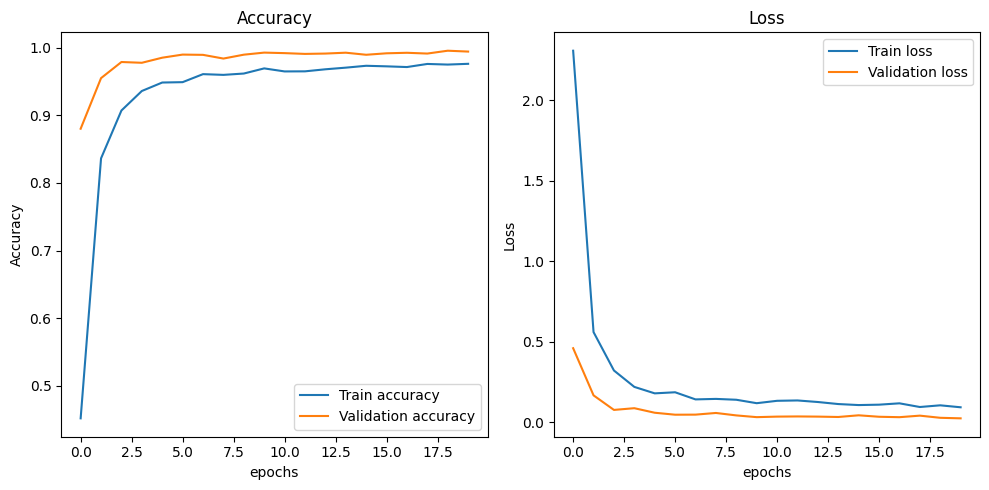

In [ ]:
import seaborn as sns

# Set up the figure
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Plot the accuracy
sns.lineplot(data=history.history, x=range(len(history.history['accuracy'])),
             y='accuracy', ax=ax1, label='Train accuracy', palette=['blue'])
sns.lineplot(data=history.history, x=range(len(history.history['val_accuracy'])),
             y='val_accuracy', ax=ax1, label='Validation accuracy', palette=['orange'])
ax1.set_title('Accuracy')
ax1.set_xlabel('epochs')
ax1.set_ylabel('Accuracy')

# Plot the loss
sns.lineplot(data=history.history, x=range(len(history.history['loss'])),
             y='loss', ax=ax2, label='Train loss', palette=['blue'])
sns.lineplot(data=history.history, x=range(len(history.history['val_loss'])),
             y='val_loss', ax=ax2, label='Validation loss', palette=['orange'])
ax2.set_title('Loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('Loss')

plt.tight_layout()
plt.show()

# Predict test data

In [ ]:
y_test = pd.read_csv('/content/drive/MyDrive/碩一下/自動駕駛/project2/Test.csv')

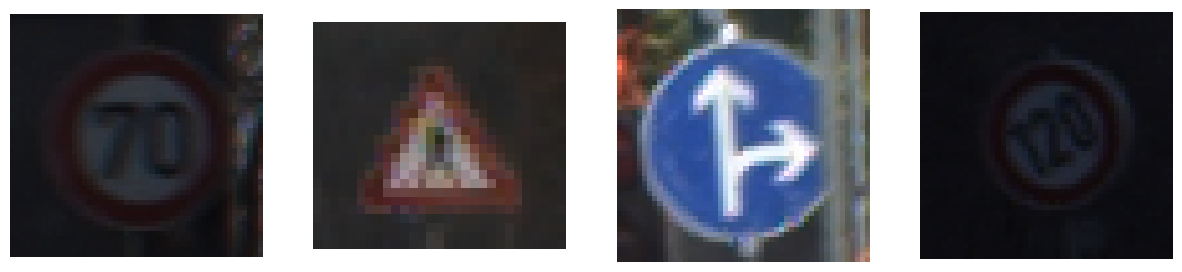

In [ ]:
import random

path = '/content/drive/MyDrive/碩一下/自動駕駛/project2/Test'
image_files = random.sample(os.listdir(path),4)
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

for i in range(len(image_files)):
    final_path = os.path.join(path,image_files[i])
    img = Image.open(final_path)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()

In [ ]:
labels_test = y_test['ClassId'].values
img_test = y_test['Path'].values

print(y_test['Path'].values)

['Test/00000.png' 'Test/00001.png' 'Test/00002.png' ... 'Test/12627.png'
 'Test/12628.png' 'Test/12629.png']


In [ ]:
test_dir = '/content/drive/MyDrive/碩一下/自動駕駛/project2'
data = []
for img in img_test:
    img_path = os.path.join(test_dir, img)
    image = Image.open(img_path)
    image = image.resize((32,32))
    data.append(np.array(image))

X_test = np.array(data)
print('Testing data : ', X_test.shape)

FileNotFoundError: ignored

In [ ]:
pred = np.argmax(model.predict(X_test),axis =1)
print("Test accuracy: ", accuracy_score(labels_test, pred) * 100 )

NameError: ignored

# Confusion Matrix

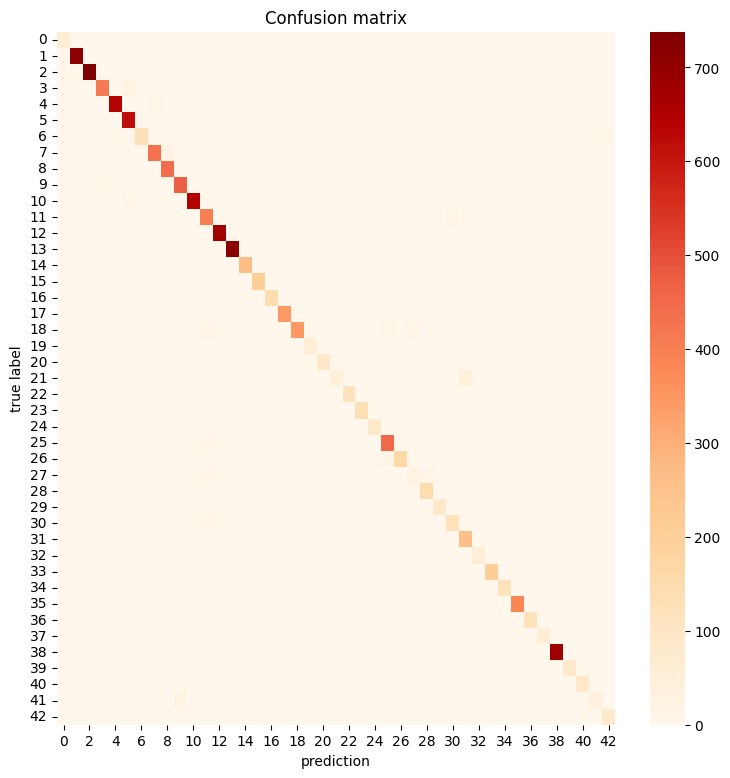

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
fig = plt.figure(figsize=(9, 9))
y_true = np.array(y_test['ClassId'])
cm = confusion_matrix(y_true,pred)
sns.heatmap(cm, cmap='OrRd', fmt='g')

plt.title('Confusion matrix')
plt.xlabel('prediction')
plt.ylabel('true label')
plt.show()